This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and the morphological index (skewness, roundness, and normalness) at $B$-, $R$-, and $IR$-band.

A tail of "1", "2", and "3" represents the skewness, roundness, and normalness, respectively.

- $\rho$ vs $MI-B$ (B1, B2, B3), $MI-R$ (R1, R2, R3), and $MI-IR$ (IR1, IR2, IR3)

- $X$ vs $MI-B$ (B1, B2, B3), $MI-R$ (R1, R2, R3), and $MI-IR$ (IR1, IR2, IR3)

In [1]:
from astropy.table import Table, join
from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# My progs
from CorrTest import R2OCorrTest

In [2]:
# Radio-to-optical offset
r2o= Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# LQAC5-catalog
lqac5 = Table.read("../data/lqac5_dr2-iers.csv", format="ascii.csv")

r2o_lqac = join(r2o, lqac5, keys="iers_name")

print("Find {:d} sources in the LQAC-5 catalog".format(len(r2o_lqac)))

Find 487 sources in the LQAC-5 catalog


# 1. Overall distribution
## 1.1. B-filter (B-band)

In [3]:
# MI index at B-band
r2o_mib = Table(r2o_lqac)
r2o_mib.keep_columns(["ang_sep_sx_1", "nor_sep_sx_1", 
                      "ang_sep_k_1", "nor_sep_k_1",
                      "ang_sep_ka_1", "nor_sep_ka_1",
                      "I1B", "I2B", "I3B"])

# Check if the MI measurement is available
# MI-B1
mask1 = (r2o_mib["I1B"].mask == False)
r2o_mib1 = r2o_mib[mask1]

# MI-B2
mask2 = (r2o_mib["I2B"].mask == False)
r2o_mib2 = r2o_mib[mask2]

# MI-B3
mask3 = (r2o_mib["I3B"].mask == False)
r2o_mib3 = r2o_mib[mask3]

print("We found B-filter morphological index MI-B1 for {:d} sources, "
      "MI-B2 for {}, and MI-B3 for {}".format(len(r2o_mib1), len(r2o_mib2), len(r2o_mib3)))

r2o_mib = Table(r2o_mib1)
del r2o_mib1, r2o_mib2, r2o_mib3

We found B-filter morphological index MI-B1 for 199 sources, MI-B2 for 199, and MI-B3 for 199


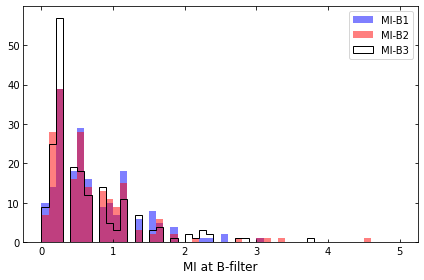

In [4]:
fig, ax = plt.subplots()

bins = np.arange(0, 5.1, 0.1)

ax.hist(r2o_mib["I1B"], bins=bins, histtype="stepfilled", color="b", alpha=0.5, label="MI-B1")
ax.hist(r2o_mib["I2B"], bins=bins, histtype="stepfilled", color="r", alpha=0.5, label="MI-B2")
ax.hist(r2o_mib["I3B"], bins=bins, histtype="step", color="k", label="MI-B3")
ax.set_xlabel("MI at B-filter", fontsize=12)

ax.legend()

plt.tight_layout()

Angular separation vs. MI-B


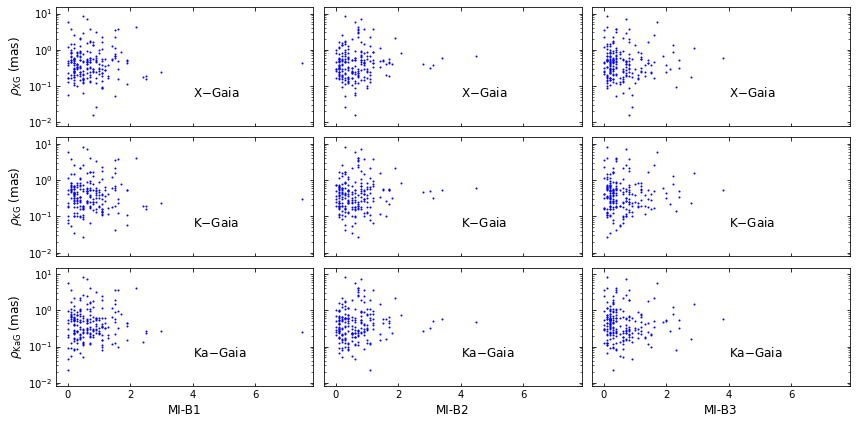

In [5]:
print("Angular separation vs. MI-B")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mib["I1B"], r2o_mib["ang_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_mib["I2B"], r2o_mib["ang_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_mib["I3B"], r2o_mib["ang_sep_sx_1"], "b.", ms=2)
ax3.plot(r2o_mib["I1B"], r2o_mib["ang_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_mib["I2B"], r2o_mib["ang_sep_k_1"], "b.", ms=2)
ax5.plot(r2o_mib["I3B"], r2o_mib["ang_sep_k_1"], "b.", ms=2)
ax6.plot(r2o_mib["I1B"], r2o_mib["ang_sep_ka_1"], "b.", ms=2)
ax7.plot(r2o_mib["I2B"], r2o_mib["ang_sep_ka_1"], "b.", ms=2)
ax8.plot(r2o_mib["I3B"], r2o_mib["ang_sep_ka_1"], "b.", ms=2)

ymin, ymax = 0.008, 15
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax3.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax6.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax6.set_xlabel("MI-B1", fontsize=12)
ax7.set_xlabel("MI-B2", fontsize=12)
ax8.set_xlabel("MI-B3", fontsize=12)

posx, posy = 4, 0.05
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

Normalized separation vs. MI-B


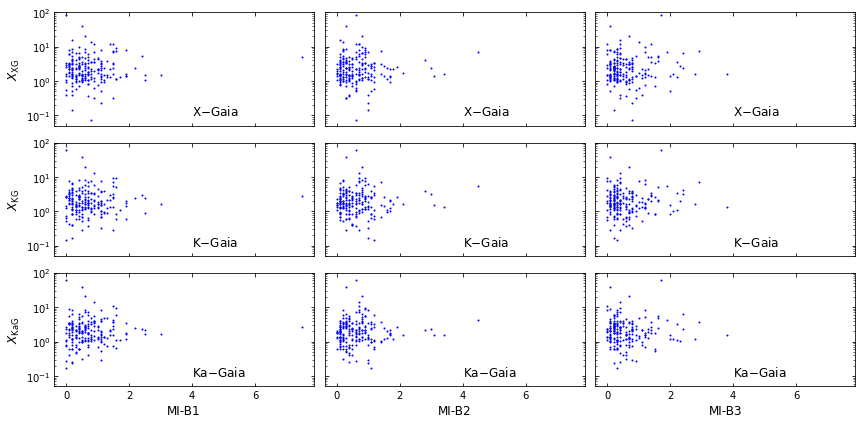

In [6]:
print("Normalized separation vs. MI-B")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mib["I1B"], r2o_mib["nor_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_mib["I2B"], r2o_mib["nor_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_mib["I3B"], r2o_mib["nor_sep_sx_1"], "b.", ms=2)
ax3.plot(r2o_mib["I1B"], r2o_mib["nor_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_mib["I2B"], r2o_mib["nor_sep_k_1"], "b.", ms=2)
ax5.plot(r2o_mib["I3B"], r2o_mib["nor_sep_k_1"], "b.", ms=2)
ax6.plot(r2o_mib["I1B"], r2o_mib["nor_sep_ka_1"], "b.", ms=2)
ax7.plot(r2o_mib["I2B"], r2o_mib["nor_sep_ka_1"], "b.", ms=2)
ax8.plot(r2o_mib["I3B"], r2o_mib["nor_sep_ka_1"], "b.", ms=2)

ymin, ymax = 0.05, 100
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax3.set_ylabel("$X_\\mathrm{KG}$", fontsize=12)
ax6.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax6.set_xlabel("MI-B1", fontsize=12)
ax7.set_xlabel("MI-B2", fontsize=12)
ax8.set_xlabel("MI-B3", fontsize=12)

posx, posy = 4, 0.1
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

## 1.2. R-filter

In [7]:
# MI index at B-band
r2o_mir = Table(r2o_lqac)
r2o_mir.keep_columns(["ang_sep_sx_1", "nor_sep_sx_1",
                      "ang_sep_k_1", "nor_sep_k_1",
                      "ang_sep_ka_1", "nor_sep_ka_1",
                      "I1R", "I2R", "I3R"])

# Check if the MI measurement is available
# MI-B1
mask1 = (r2o_mir["I1R"].mask == False)
r2o_mir1 = r2o_mir[mask1]

# MI-B2
mask2 = (r2o_mir["I2R"].mask == False)
r2o_mir2 = r2o_mir[mask2]

# MI-B3
mask3 = (r2o_mir["I3R"].mask == False)
r2o_mir3 = r2o_mir[mask3]

print("We found R-filter morphological index MI-R1 for {:d} sources, "
      "MI-R2 for {}, and MI-R3 for {}".format(len(r2o_mir1), len(r2o_mir2), len(r2o_mir3)))

r2o_mir = Table(r2o_mir1)
del r2o_mir1, r2o_mir2, r2o_mir3

We found R-filter morphological index MI-R1 for 396 sources, MI-R2 for 396, and MI-R3 for 396


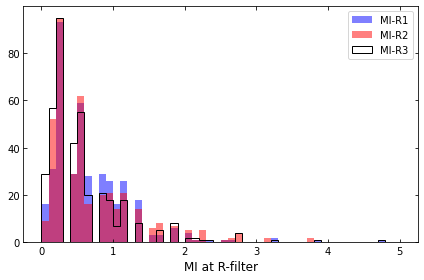

In [8]:
fig, ax = plt.subplots()

bins = np.arange(0, 5.1, 0.1)

ax.hist(r2o_mir["I1R"], bins=bins, histtype="stepfilled", color="b", alpha=0.5, label="MI-R1")
ax.hist(r2o_mir["I2R"], bins=bins, histtype="stepfilled", color="r", alpha=0.5, label="MI-R2")
ax.hist(r2o_mir["I3R"], bins=bins, histtype="step", color="k", label="MI-R3")
ax.set_xlabel("MI at R-filter", fontsize=12)

ax.legend()

plt.tight_layout()

Angular separation vs. MI-R


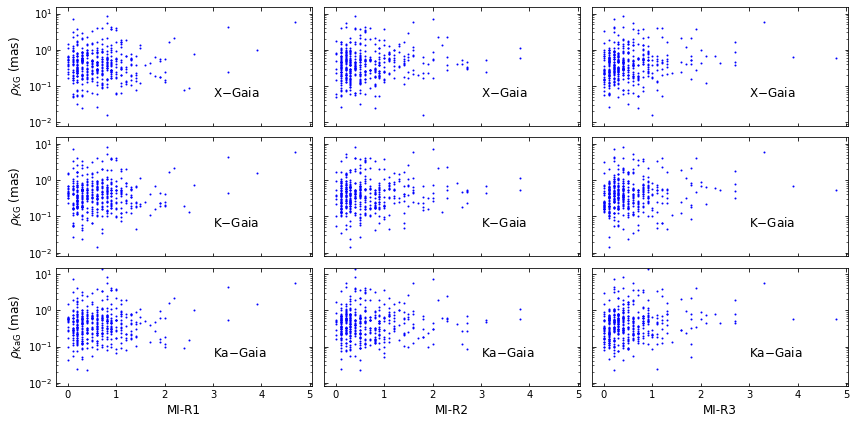

In [9]:
print("Angular separation vs. MI-R")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mir["I1R"], r2o_mir["ang_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_mir["I2R"], r2o_mir["ang_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_mir["I3R"], r2o_mir["ang_sep_sx_1"], "b.", ms=2)
ax3.plot(r2o_mir["I1R"], r2o_mir["ang_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_mir["I2R"], r2o_mir["ang_sep_k_1"], "b.", ms=2)
ax5.plot(r2o_mir["I3R"], r2o_mir["ang_sep_k_1"], "b.", ms=2)
ax6.plot(r2o_mir["I1R"], r2o_mir["ang_sep_ka_1"], "b.", ms=2)
ax7.plot(r2o_mir["I2R"], r2o_mir["ang_sep_ka_1"], "b.", ms=2)
ax8.plot(r2o_mir["I3R"], r2o_mir["ang_sep_ka_1"], "b.", ms=2)

ymin, ymax = 0.008, 15
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax3.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax6.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax6.set_xlabel("MI-R1", fontsize=12)
ax7.set_xlabel("MI-R2", fontsize=12)
ax8.set_xlabel("MI-R3", fontsize=12)

posx, posy = 3, 0.05
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

Normalized separation vs. MI-R


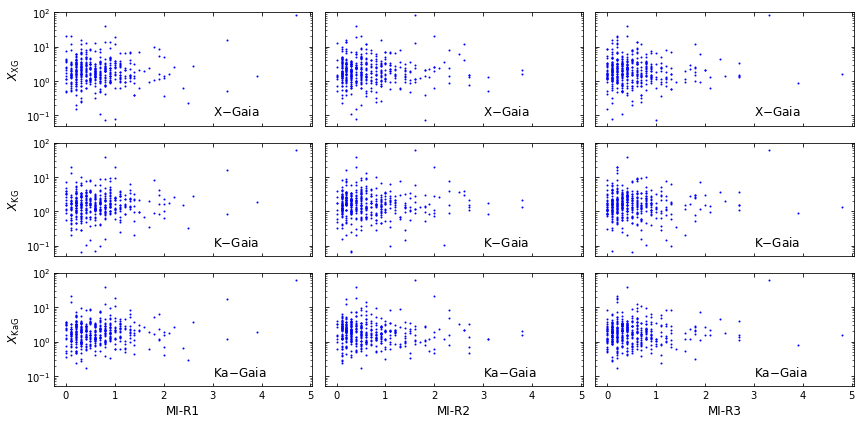

In [10]:
print("Normalized separation vs. MI-R")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mir["I1R"], r2o_mir["nor_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_mir["I2R"], r2o_mir["nor_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_mir["I3R"], r2o_mir["nor_sep_sx_1"], "b.", ms=2)
ax3.plot(r2o_mir["I1R"], r2o_mir["nor_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_mir["I2R"], r2o_mir["nor_sep_k_1"], "b.", ms=2)
ax5.plot(r2o_mir["I3R"], r2o_mir["nor_sep_k_1"], "b.", ms=2)
ax6.plot(r2o_mir["I1R"], r2o_mir["nor_sep_ka_1"], "b.", ms=2)
ax7.plot(r2o_mir["I2R"], r2o_mir["nor_sep_ka_1"], "b.", ms=2)
ax8.plot(r2o_mir["I3R"], r2o_mir["nor_sep_ka_1"], "b.", ms=2)

ymin, ymax = 0.05, 100
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax3.set_ylabel("$X_\\mathrm{KG}$", fontsize=12)
ax6.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax6.set_xlabel("MI-R1", fontsize=12)
ax7.set_xlabel("MI-R2", fontsize=12)
ax8.set_xlabel("MI-R3", fontsize=12)

posx, posy = 3, 0.1
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

## 1.3. IR-filter

In [11]:
# MI index at IR-band
r2o_mii = Table(r2o_lqac)
r2o_mii.keep_columns(["ang_sep_sx_1", "nor_sep_sx_1",
                      "ang_sep_k_1", "nor_sep_k_1",
                      "ang_sep_ka_1", "nor_sep_ka_1",
                      "I1I", "I2I", "I3I"])

# Check if the MI measurement is available
# MI-B1
mask1 = (r2o_mii["I1I"].mask == False)
r2o_mii1 = r2o_mii[mask1]

# MI-B2
mask2 = (r2o_mii["I2I"].mask == False)
r2o_mii2 = r2o_mii[mask2]

# MI-B3
mask3 = (r2o_mii["I3I"].mask == False)
r2o_mii3 = r2o_mii[mask3]

print("We found R-filter morphological index MI-IR1 for {:d} sources, "
      "MI-IR2 for {}, and MI-IR3 for {}".format(len(r2o_mii1), len(r2o_mii2), len(r2o_mii3)))

r2o_mii = Table(r2o_mii1)
del r2o_mii1, r2o_mii2, r2o_mii3

We found R-filter morphological index MI-IR1 for 340 sources, MI-IR2 for 340, and MI-IR3 for 340


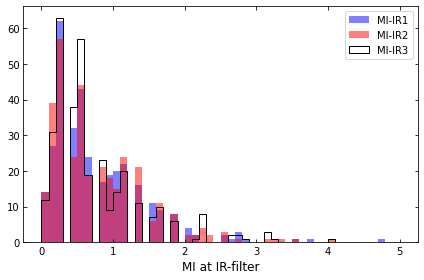

In [12]:
fig, ax = plt.subplots()

bins = np.arange(0, 5.1, 0.1)

ax.hist(r2o_mii["I1I"], bins=bins, histtype="stepfilled", color="b", alpha=0.5, label="MI-IR1")
ax.hist(r2o_mii["I2I"], bins=bins, histtype="stepfilled", color="r", alpha=0.5, label="MI-IR2")
ax.hist(r2o_mii["I3I"], bins=bins, histtype="step", color="k", label="MI-IR3")
ax.set_xlabel("MI at IR-filter", fontsize=12)

ax.legend()

plt.tight_layout()

Angular separation vs. MI-IR


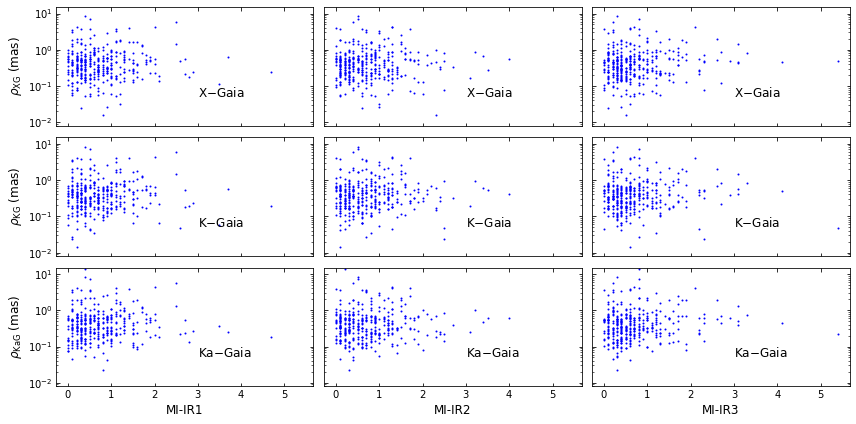

In [13]:
print("Angular separation vs. MI-IR")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mii["I1I"], r2o_mii["ang_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_mii["I2I"], r2o_mii["ang_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_mii["I3I"], r2o_mii["ang_sep_sx_1"], "b.", ms=2)
ax3.plot(r2o_mii["I1I"], r2o_mii["ang_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_mii["I2I"], r2o_mii["ang_sep_k_1"], "b.", ms=2)
ax5.plot(r2o_mii["I3I"], r2o_mii["ang_sep_k_1"], "b.", ms=2)
ax6.plot(r2o_mii["I1I"], r2o_mii["ang_sep_ka_1"], "b.", ms=2)
ax7.plot(r2o_mii["I2I"], r2o_mii["ang_sep_ka_1"], "b.", ms=2)
ax8.plot(r2o_mii["I3I"], r2o_mii["ang_sep_ka_1"], "b.", ms=2)

ymin, ymax = 0.008, 15
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax3.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax6.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax6.set_xlabel("MI-IR1", fontsize=12)
ax7.set_xlabel("MI-IR2", fontsize=12)
ax8.set_xlabel("MI-IR3", fontsize=12)

posx, posy = 3, 0.05
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

Normalized separation vs. MI-IR


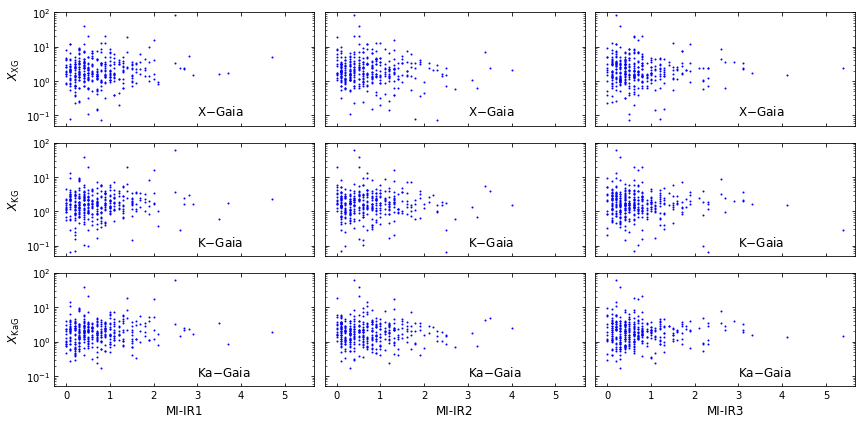

In [14]:
print("Normalized separation vs. MI-IR")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mii["I1I"], r2o_mii["nor_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o_mii["I2I"], r2o_mii["nor_sep_sx_1"], "b.", ms=2)
ax2.plot(r2o_mii["I3I"], r2o_mii["nor_sep_sx_1"], "b.", ms=2)
ax3.plot(r2o_mii["I1I"], r2o_mii["nor_sep_k_1"], "b.", ms=2)
ax4.plot(r2o_mii["I2I"], r2o_mii["nor_sep_k_1"], "b.", ms=2)
ax5.plot(r2o_mii["I3I"], r2o_mii["nor_sep_k_1"], "b.", ms=2)
ax6.plot(r2o_mii["I1I"], r2o_mii["nor_sep_ka_1"], "b.", ms=2)
ax7.plot(r2o_mii["I2I"], r2o_mii["nor_sep_ka_1"], "b.", ms=2)
ax8.plot(r2o_mii["I3I"], r2o_mii["nor_sep_ka_1"], "b.", ms=2)

ymin, ymax = 0.05, 100
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax3.set_ylabel("$X_\\mathrm{KG}$", fontsize=12)
ax6.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax6.set_xlabel("MI-IR1", fontsize=12)
ax7.set_xlabel("MI-IR2", fontsize=12)
ax8.set_xlabel("MI-IR3", fontsize=12)

posx, posy = 3, 0.1
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

# 2. Correlation test

## 2.1 Angular separation $\rho$  and normalized separation $X$vs. MI at $B$-filter

### 2.1.1 $\rho$ vs MI-B1

In [15]:
# Array of bin size
bin_array = np.arange(1, 31, 2)

# Sort the table
r2o_mib.sort("I1B")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mib, "I1B", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


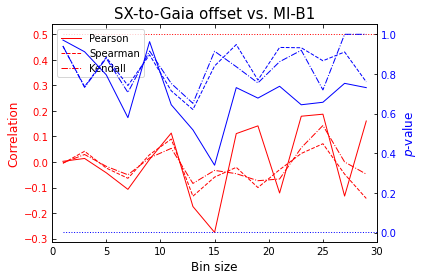

In [16]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-B1", fontsize=15)
fig.tight_layout()

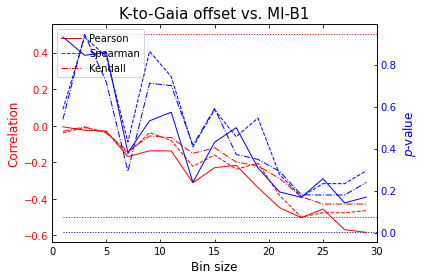

In [17]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-B1", fontsize=15)
fig.tight_layout()

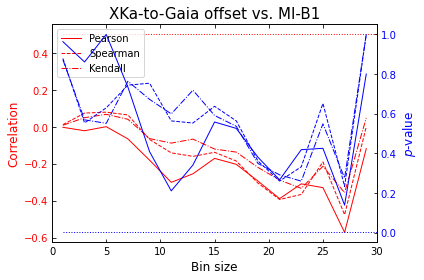

In [18]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-B1", fontsize=15)
fig.tight_layout()

### 2.2.2 $X$ vs MI-B1

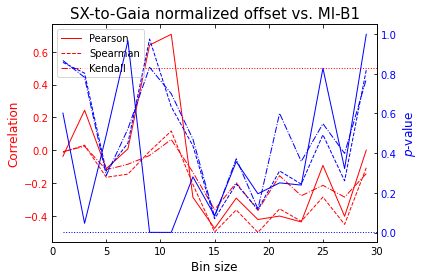

In [19]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-B1", fontsize=15)
fig.tight_layout()

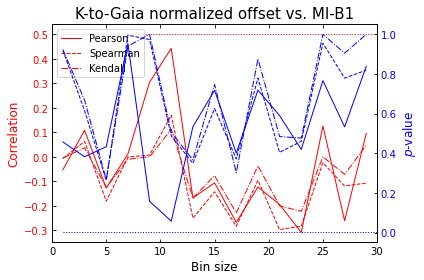

In [20]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-B1", fontsize=15)
fig.tight_layout()

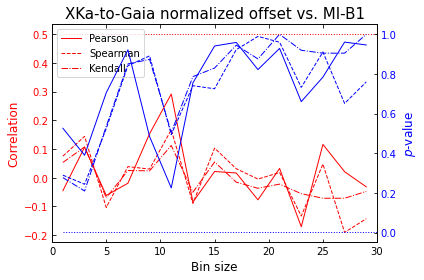

In [21]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-B1", fontsize=15)
fig.tight_layout()

### 2.1.3 $\rho$ vs MI-B2

In [22]:
# Array of bin size
bin_array = np.arange(1, 31, 2)

# Sort the table
r2o_mib.sort("I2B")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mib, "I2B", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


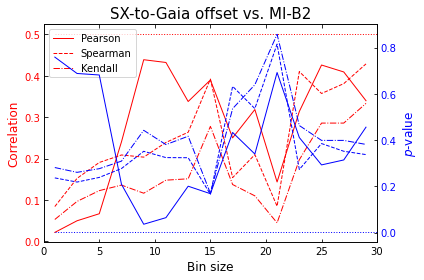

In [23]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-B2", fontsize=15)
fig.tight_layout()

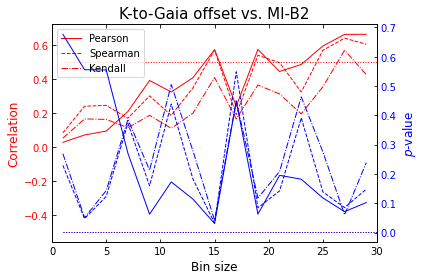

In [24]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-B2", fontsize=15)
fig.tight_layout()

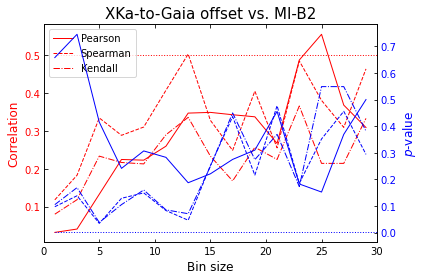

In [25]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-B2", fontsize=15)
fig.tight_layout()

### 2.1.4 $X$ vs MI-B2

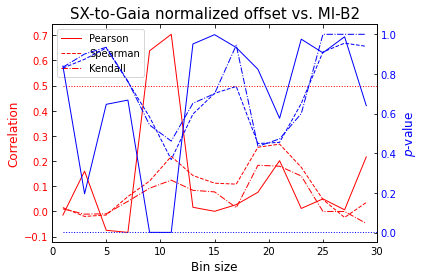

In [26]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-B2", fontsize=15)
fig.tight_layout()

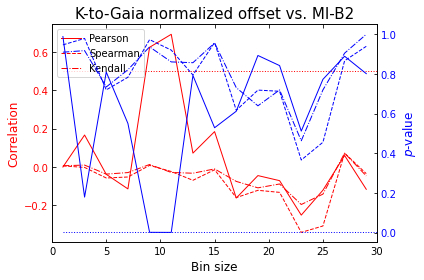

In [27]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-B2", fontsize=15)
fig.tight_layout()

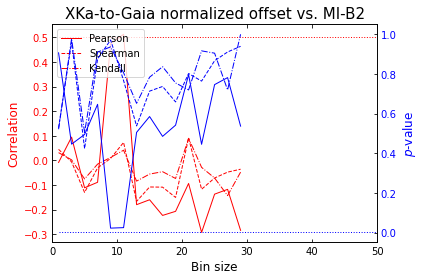

In [28]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-B2", fontsize=15)
fig.tight_layout()

### 2.1.5 $\rho$ vs MI-B3

In [29]:
# Array of bin size
bin_array = np.arange(1, 31, 2)

# Sort the table
r2o_mib.sort("I3B")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mib, "I3B", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


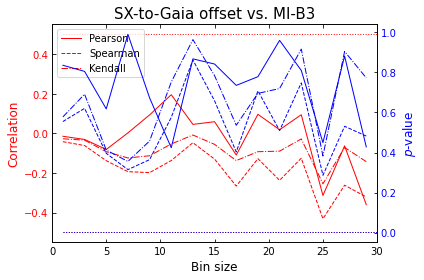

In [30]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-B3", fontsize=15)
fig.tight_layout()

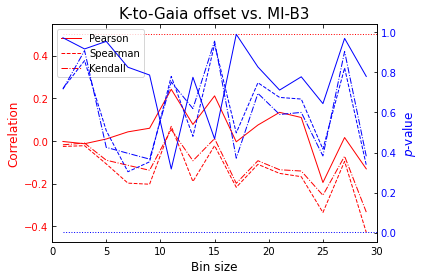

In [31]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-B3", fontsize=15)
fig.tight_layout()

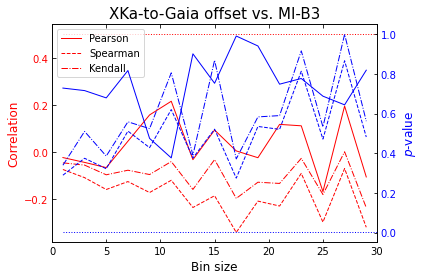

In [32]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-B3", fontsize=15)
fig.tight_layout()

### 2.1.6 $X$ vs MI-B2

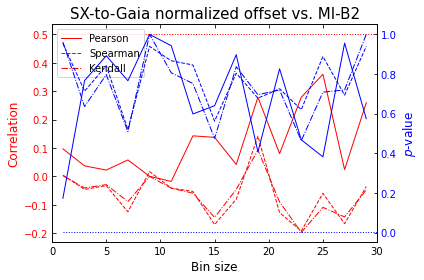

In [33]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 31, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-B2", fontsize=15)
fig.tight_layout()

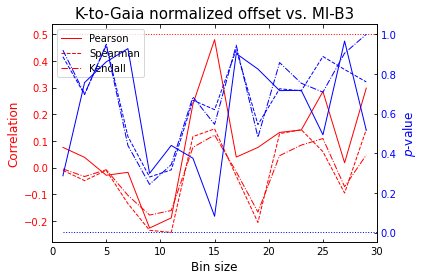

In [34]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 31, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-B3", fontsize=15)
fig.tight_layout()

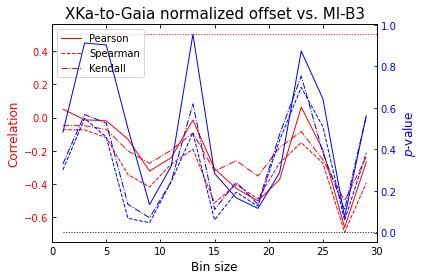

In [35]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 31, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 30])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 31, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-B3", fontsize=15)
fig.tight_layout()

## 2.2 Angular separation $\rho$  and normalized separation $X$vs. MI at $R$-filter

### 2.2.1 $\rho$ vs MI-R1

In [36]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

# Sort the table
r2o_mir.sort("I1R")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mir, "I1R", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


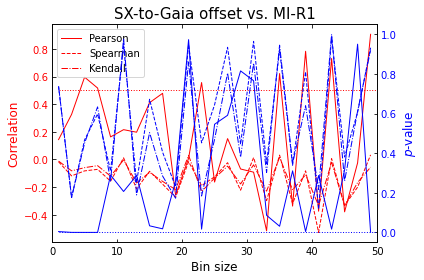

In [37]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-R1", fontsize=15)
fig.tight_layout()

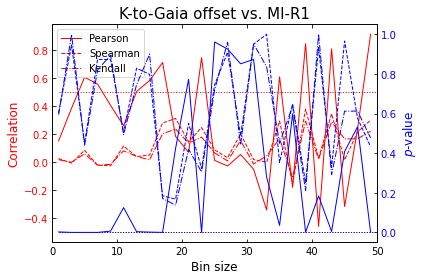

In [38]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-R1", fontsize=15)
fig.tight_layout()

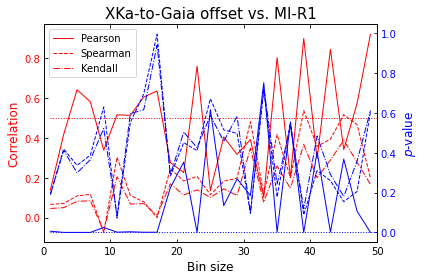

In [39]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-R1", fontsize=15)
fig.tight_layout()

### 2.2.2 $X$ vs MI-R1

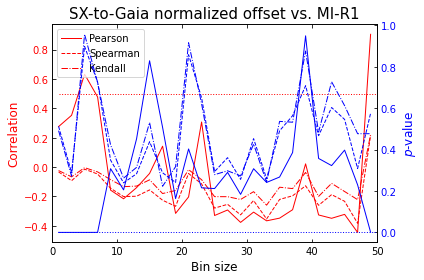

In [40]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-R1", fontsize=15)
fig.tight_layout()

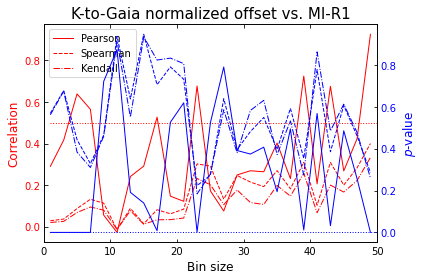

In [41]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-R1", fontsize=15)
fig.tight_layout()

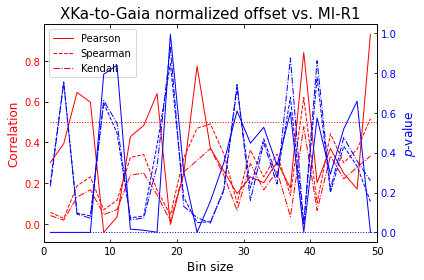

In [42]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-R1", fontsize=15)
fig.tight_layout()

### 2.2.3 $\rho$ vs MI-R2

In [43]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

# Sort the table
r2o_mir.sort("I2R")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mir, "I2R", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


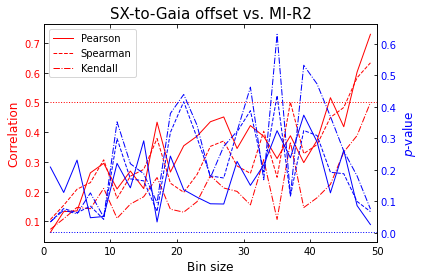

In [44]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-R2", fontsize=15)
fig.tight_layout()

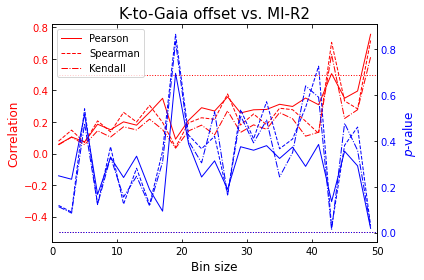

In [45]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-R2", fontsize=15)
fig.tight_layout()

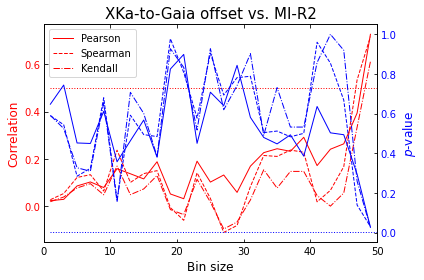

In [46]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-R2", fontsize=15)
fig.tight_layout()

### 2.2.4 $X$ vs MI-R2

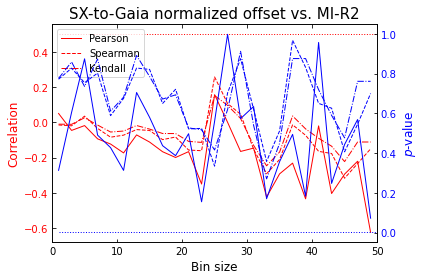

In [47]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-R2", fontsize=15)
fig.tight_layout()

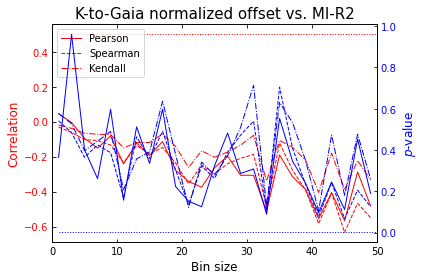

In [48]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-R2", fontsize=15)
fig.tight_layout()

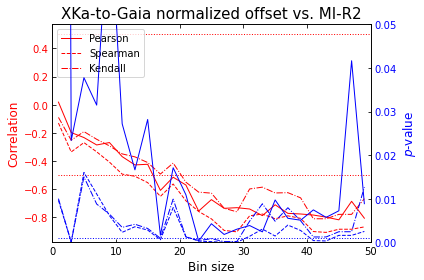

In [49]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")
ax2.set_ylim([0, 0.05])

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-R2", fontsize=15)
fig.tight_layout()

### 2.2.5 $\rho$ vs MI-R3

In [50]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

# Sort the table
r2o_mir.sort("I3R")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mir, "I3R", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


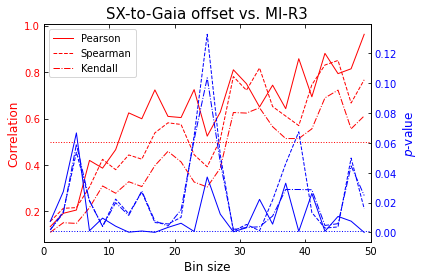

In [51]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-R3", fontsize=15)
fig.tight_layout()

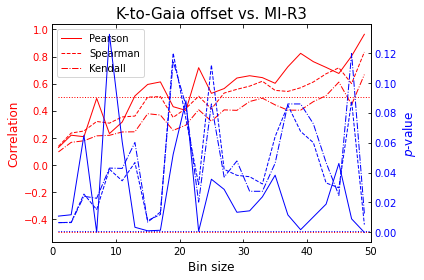

In [52]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-R3", fontsize=15)
fig.tight_layout()

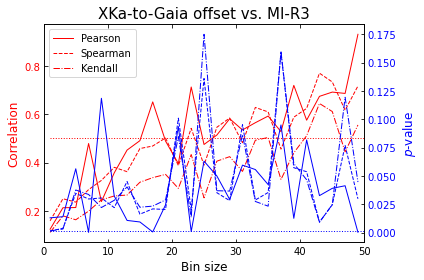

In [53]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-R3", fontsize=15)
fig.tight_layout()

### 2.2.6 $X$ vs MI-R3

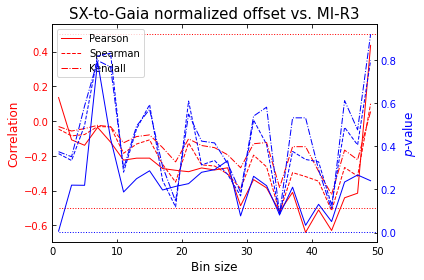

In [54]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-R3", fontsize=15)
fig.tight_layout()

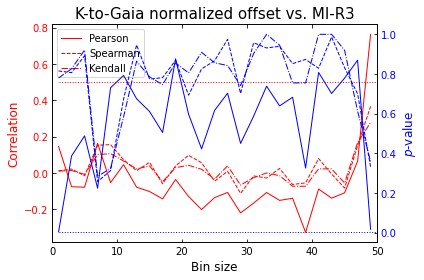

In [55]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-R3", fontsize=15)
fig.tight_layout()

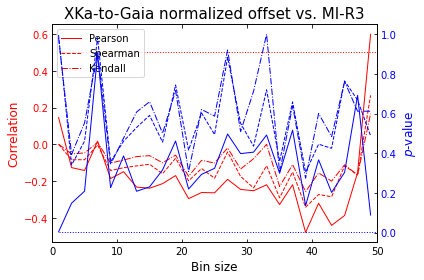

In [56]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-R3", fontsize=15)
fig.tight_layout()

## 2.3 Angular separation $\rho$  and normalized separation $X$vs. MI at $IR$-filter

### 2.3.1 $\rho$ vs MI-IR1

In [57]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

# Sort the table
r2o_mii.sort("I1I")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mii, "I1I", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


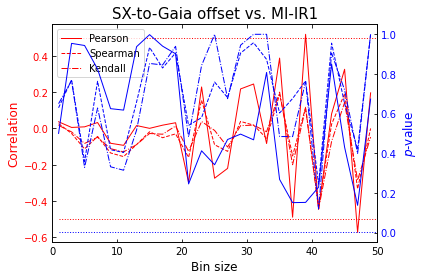

In [58]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-IR1", fontsize=15)
fig.tight_layout()

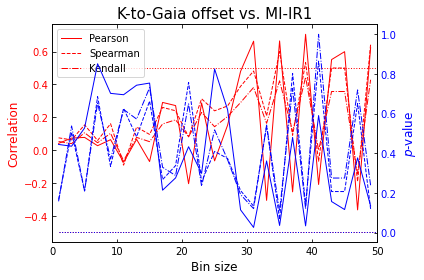

In [59]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-IR1", fontsize=15)
fig.tight_layout()

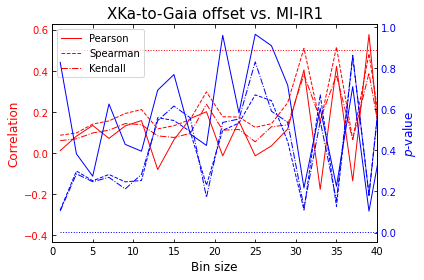

In [60]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 40])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-IR1", fontsize=15)
fig.tight_layout()

### 2.3.2 $X$ vs MI-IR1

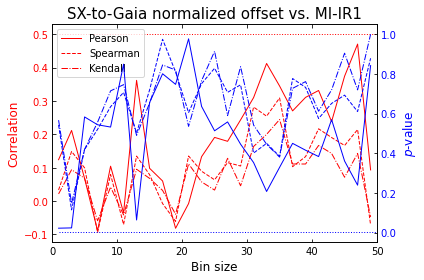

In [61]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-IR1", fontsize=15)
fig.tight_layout()

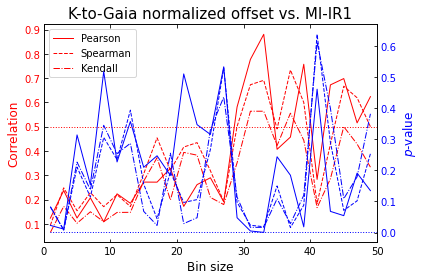

In [62]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-IR1", fontsize=15)
fig.tight_layout()

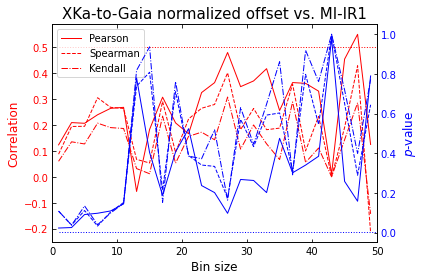

In [63]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-IR1", fontsize=15)
fig.tight_layout()

### 2.3.3 $\rho$ vs MI-IR2

In [64]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

# Sort the table
r2o_mii.sort("I2I")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mii, "I2I", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


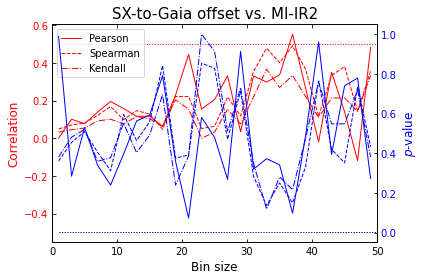

In [65]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-IR2", fontsize=15)
fig.tight_layout()

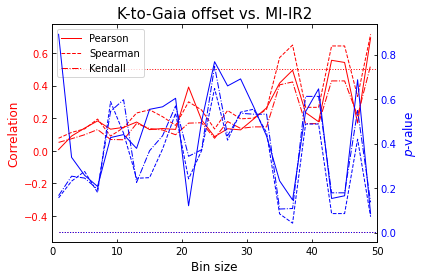

In [66]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-IR2", fontsize=15)
fig.tight_layout()

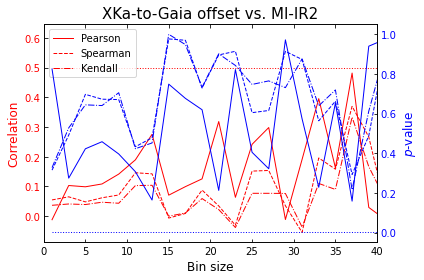

In [67]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 40])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-IR2", fontsize=15)
fig.tight_layout()

### 2.3.4 $X$ vs MI-IR2

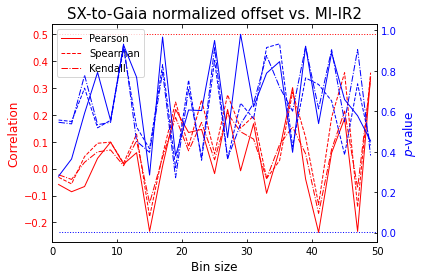

In [68]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-IR2", fontsize=15)
fig.tight_layout()

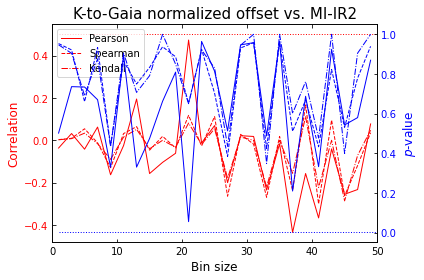

In [69]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-IR2", fontsize=15)
fig.tight_layout()

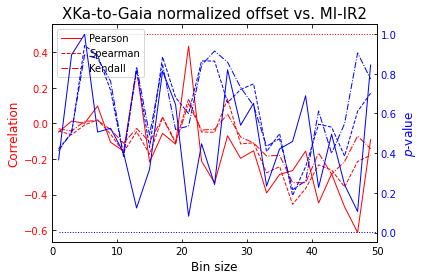

In [70]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-IR2", fontsize=15)
fig.tight_layout()

### 2.3.5 $\rho$ vs MI-IR3

In [71]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

# Sort the table
r2o_mii.sort("I3I")
# Correlation test
rho_corr, x_corr = R2OCorrTest(r2o_mii, "I3I", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


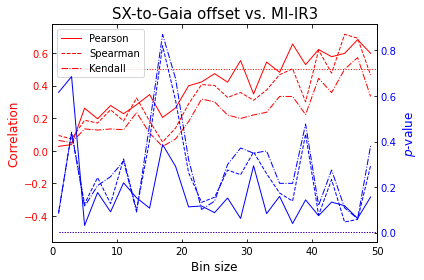

In [72]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. MI-IR3", fontsize=15)
fig.tight_layout()

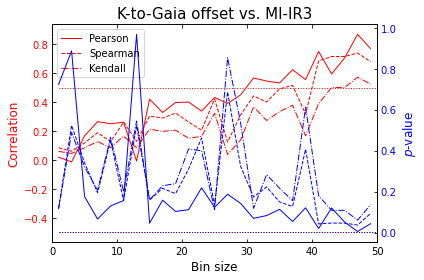

In [73]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.hlines(-0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. MI-IR3", fontsize=15)
fig.tight_layout()

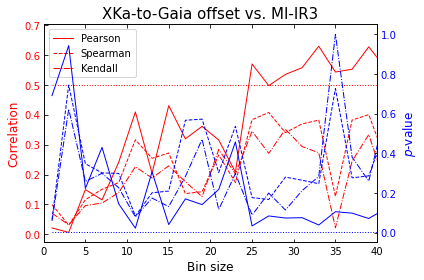

In [74]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 40])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. MI-IR3", fontsize=15)
fig.tight_layout()

### 2.3.6 $X$ vs MI-IR3

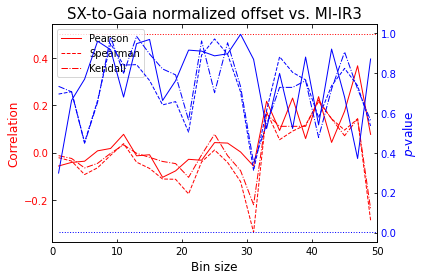

In [75]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. MI-IR3", fontsize=15)
fig.tight_layout()

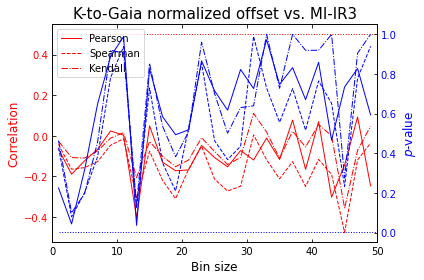

In [76]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. MI-IR3", fontsize=15)
fig.tight_layout()

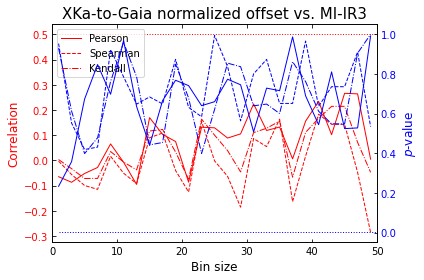

In [77]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. MI-IR3", fontsize=15)
fig.tight_layout()